In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\salon\OneDrive\Desktop\laptop_data (1).csv")
print(df)


      Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...            

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [3]:
print(df.columns)


Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


In [4]:

df = df.drop(columns=['Unnamed: 0'])
print(df)


     Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
130

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [6]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
print(df.columns)

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


In [8]:
df['Ram'] = df['Ram'].str.replace('GB', '')

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
df['Weight'] = df['Weight'].str.replace('kg', '')

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
df['Weight']=df['Weight'].astype(float)


In [13]:
df['Ram']= df['Ram'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


In [15]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 117.2+ KB


In [17]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 127.4+ KB


In [19]:
df['X_Res'] = df['ScreenResolution'].str.extract(r'(\d+)x')[0].astype(float)
df['Y_Res'] = df['ScreenResolution'].str.extract(r'x(\d+)')[0].astype(float)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_Res             1303 non-null   float64
 14  Y_Res             1303 non-null   float64
dtypes: float64(5), int32(1), int64(2), object(7)
memory usage: 147.7+ KB


In [21]:
df['ppi'] = (((df['X_Res']**2) + (df['Y_Res']**2)) ** 0.5 / df['Inches']).round(2)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_Res             1303 non-null   float64
 14  Y_Res             1303 non-null   float64
 15  ppi               1303 non-null   float64
dtypes: float64(6), int32(1), int64(2), object(

In [23]:
df['CPU Name'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[:3]))


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_Res             1303 non-null   float64
 14  Y_Res             1303 non-null   float64
 15  ppi               1303 non-null   float64
 16  CPU Name          1303 non-null   object 


In [25]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [26]:

df['CPU_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_Res             1303 non-null   float64
 14  Y_Res             1303 non-null   float64
 15  ppi               1303 non-null   float64
 16  CPU Name          1303 non-null   object 


In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_Res,Y_Res,ppi,CPU Name,CPU_Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560.0,1600.0,226.98,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440.0,900.0,127.68,Intel Core i5,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920.0,1080.0,141.21,Intel Core i5,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880.0,1800.0,220.53,Intel Core i7,Intel
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560.0,1600.0,226.98,Intel Core i5,Intel


In [29]:
import re
df['CPU_GHz'] = df['Cpu'].apply(lambda x: float(re.findall(r'(\d+\.\d+)GHz', x)[0]) if re.findall(r'(\d+\.\d+)GHz', x) else np.nan)


In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_Res,Y_Res,ppi,CPU Name,CPU_Brand,CPU_GHz
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560.0,1600.0,226.98,Intel Core i5,Intel,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440.0,900.0,127.68,Intel Core i5,Intel,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920.0,1080.0,141.21,Intel Core i5,Intel,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880.0,1800.0,220.53,Intel Core i7,Intel,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560.0,1600.0,226.98,Intel Core i5,Intel,3.1


In [31]:
df = df.drop(columns=['Cpu'])


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  Touchscreen       1303 non-null   int64  
 11  IPS               1303 non-null   int64  
 12  X_Res             1303 non-null   float64
 13  Y_Res             1303 non-null   float64
 14  ppi               1303 non-null   float64
 15  CPU Name          1303 non-null   object 
 16  CPU_Brand         1303 non-null   object 


In [33]:
df['GPU_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_Res,Y_Res,ppi,CPU Name,CPU_Brand,CPU_GHz,GPU_Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560.0,1600.0,226.98,Intel Core i5,Intel,2.3,Intel
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440.0,900.0,127.68,Intel Core i5,Intel,1.8,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920.0,1080.0,141.21,Intel Core i5,Intel,2.5,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880.0,1800.0,220.53,Intel Core i7,Intel,2.7,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560.0,1600.0,226.98,Intel Core i5,Intel,3.1,Intel


In [35]:
df['GPU_Model'] = df['Gpu'].apply(lambda x: ' '.join(x.split()[1:]))
df['GPU_Model'].head()

0    Iris Plus Graphics 640
1          HD Graphics 6000
2           HD Graphics 620
3            Radeon Pro 455
4    Iris Plus Graphics 650
Name: GPU_Model, dtype: object

In [36]:
df = df.drop(columns=['Gpu'])


In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,X_Res,Y_Res,ppi,CPU Name,CPU_Brand,CPU_GHz,GPU_Brand,GPU_Model
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,71378.6832,0,1,2560.0,1600.0,226.98,Intel Core i5,Intel,2.3,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,1440.0,900.0,127.68,Intel Core i5,Intel,1.8,Intel,HD Graphics 6000
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,30636.0000,0,0,1920.0,1080.0,141.21,Intel Core i5,Intel,2.5,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,135195.3360,0,1,2880.0,1800.0,220.53,Intel Core i7,Intel,2.7,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,96095.8080,0,1,2560.0,1600.0,226.98,Intel Core i5,Intel,3.1,Intel,Iris Plus Graphics 650


In [38]:
df['Memory'] = df['Memory'].str.replace(r'\s+', ' ', regex=True)

df['Memory'] = df['Memory'].str.replace('TB', '000GB')

df[['Primary_Storage', 'Secondary_Storage']] = df['Memory'].str.split('+', n=1, expand=True)


In [39]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,Touchscreen,...,X_Res,Y_Res,ppi,CPU Name,CPU_Brand,CPU_GHz,GPU_Brand,GPU_Model,Primary_Storage,Secondary_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,71378.6832,0,...,2560.0,1600.0,226.98,Intel Core i5,Intel,2.3,Intel,Iris Plus Graphics 640,128GB SSD,None
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,47895.5232,0,...,1440.0,900.0,127.68,Intel Core i5,Intel,1.8,Intel,HD Graphics 6000,128GB Flash Storage,None
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,30636.0000,0,...,1920.0,1080.0,141.21,Intel Core i5,Intel,2.5,Intel,HD Graphics 620,256GB SSD,None
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,135195.3360,0,...,2880.0,1800.0,220.53,Intel Core i7,Intel,2.7,AMD,Radeon Pro 455,512GB SSD,None
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,96095.8080,0,...,2560.0,1600.0,226.98,Intel Core i5,Intel,3.1,Intel,Iris Plus Graphics 650,256GB SSD,None


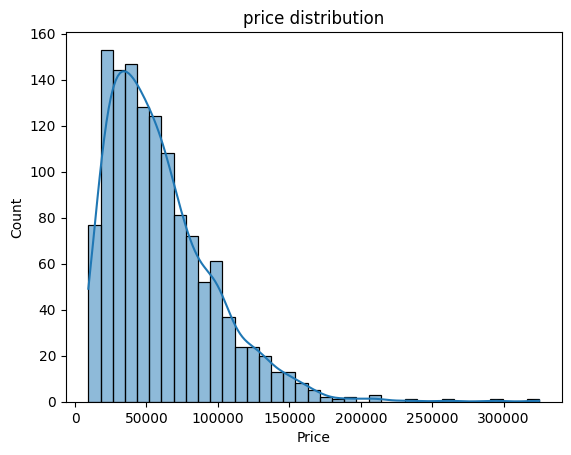

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.histplot(df['Price'],kde = True)
plt.title("price distribution")
plt.show()

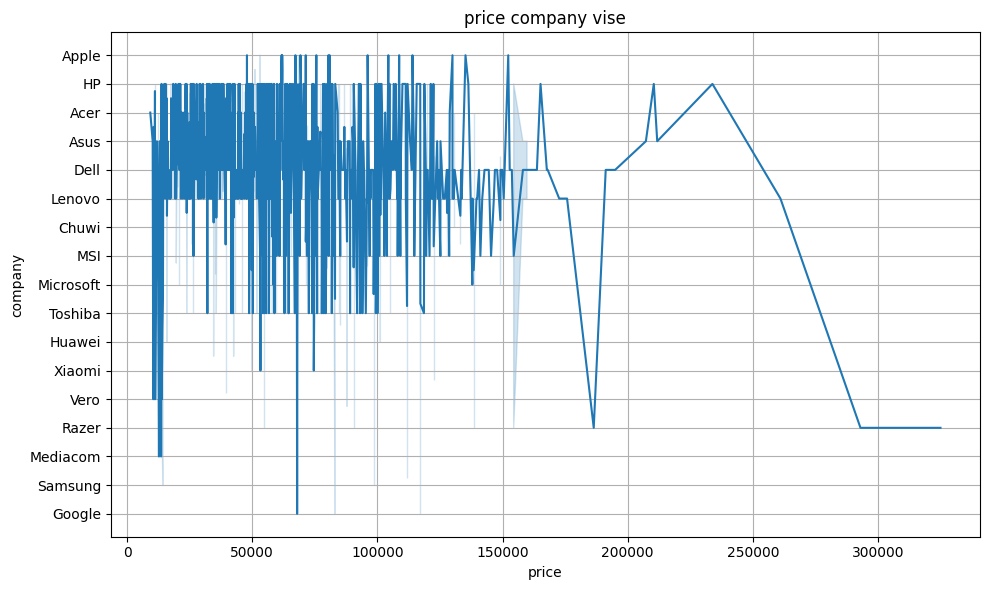

In [41]:
plt.figure(figsize = (10,6))

sns.lineplot(x="Price", y="Company", data= df)
plt.title("price company vise")
plt.xlabel("price")
plt.ylabel("company")
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'price')

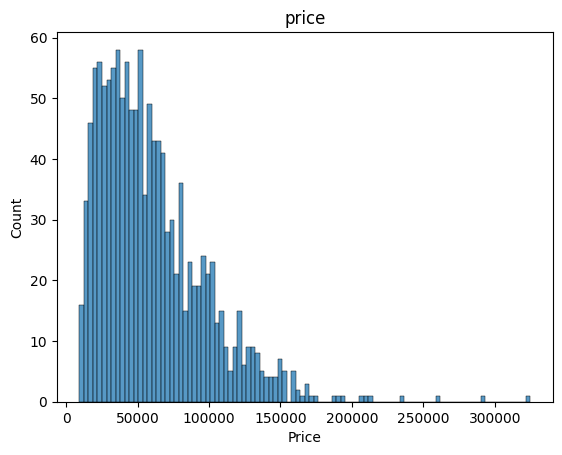

In [42]:
sns.histplot(df["Price"], bins=100)
plt.title("price")

Text(0.5, 1.0, 'company name')

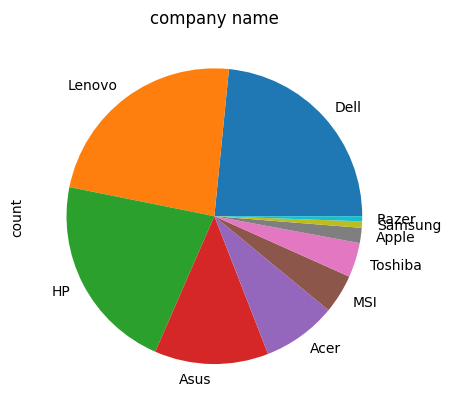

In [43]:
df['Company'].value_counts().head(10).plot(kind='pie')
plt.title("company name")

Text(0.5, 1.0, 'Weight')

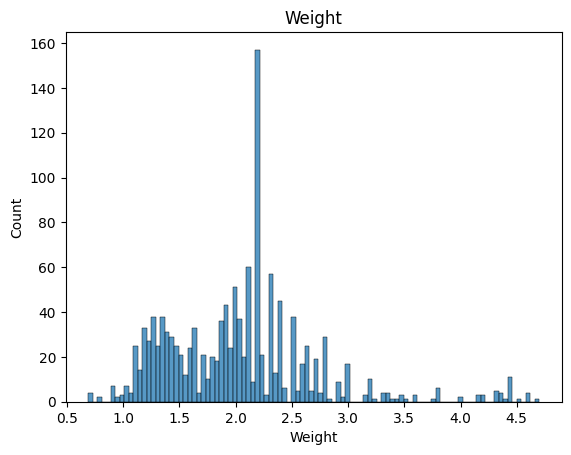

In [44]:
sns.histplot(df["Weight"], bins=100)
plt.title("Weight")

Text(0.5, 1.0, 'Touchscreen')

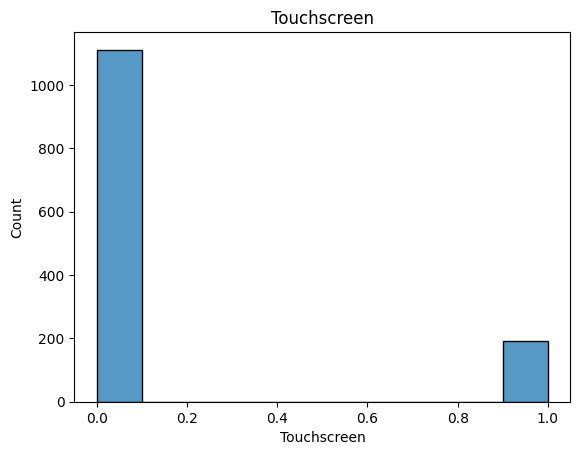

In [45]:
sns.histplot(df["Touchscreen"], bins=10)
plt.title("Touchscreen")

Text(0.5, 1.0, 'GPU_Brand')

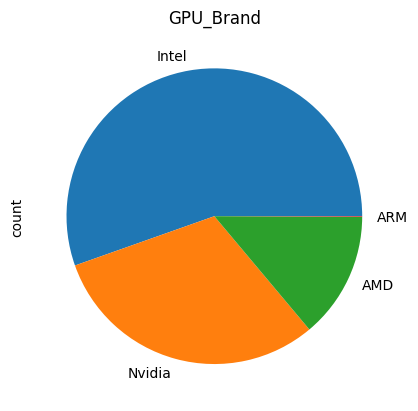

In [46]:
df['GPU_Brand'].value_counts().head(10).plot(kind='pie')
plt.title("GPU_Brand")

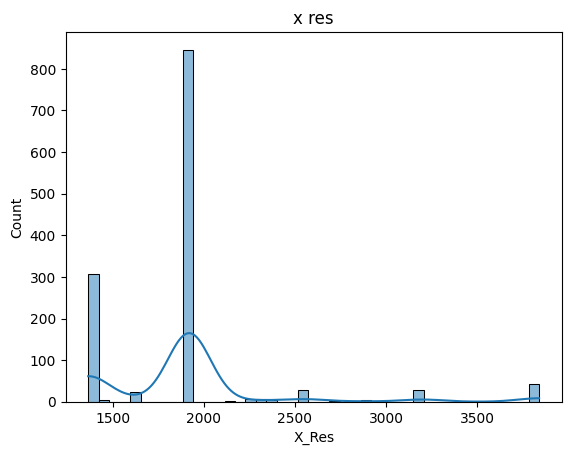

In [47]:
sns.histplot(df['X_Res'],kde = True)
plt.title("x res")
plt.show()

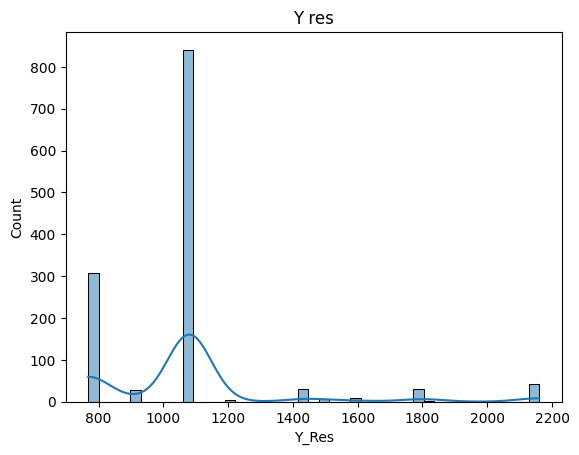

In [48]:
sns.histplot(df['Y_Res'],kde = True)
plt.title("Y res")
plt.show()

In [49]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,Touchscreen,...,X_Res,Y_Res,ppi,CPU Name,CPU_Brand,CPU_GHz,GPU_Brand,GPU_Model,Primary_Storage,Secondary_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,71378.6832,0,...,2560.0,1600.0,226.98,Intel Core i5,Intel,2.3,Intel,Iris Plus Graphics 640,128GB SSD,None
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,47895.5232,0,...,1440.0,900.0,127.68,Intel Core i5,Intel,1.8,Intel,HD Graphics 6000,128GB Flash Storage,None
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,30636.0000,0,...,1920.0,1080.0,141.21,Intel Core i5,Intel,2.5,Intel,HD Graphics 620,256GB SSD,None
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,135195.3360,0,...,2880.0,1800.0,220.53,Intel Core i7,Intel,2.7,AMD,Radeon Pro 455,512GB SSD,None
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,96095.8080,0,...,2560.0,1600.0,226.98,Intel Core i5,Intel,3.1,Intel,Iris Plus Graphics 650,256GB SSD,None


In [50]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

df['TypeName'] = le.fit_transform(df['TypeName'].astype(str))
df['OpSys'] = le.fit_transform(df['OpSys'].astype(str))
df['CPU Name'] = le.fit_transform(df['CPU Name'].astype(str))
df['CPU_Brand'] = le.fit_transform(df['CPU_Brand'].astype(str))
df['GPU_Brand'] = le.fit_transform(df['GPU_Brand'].astype(str))
df['GPU_Model'] = le.fit_transform(df['GPU_Model'].astype(str))
df['Primary_Storage'] = le.fit_transform(df['Primary_Storage'].astype(str))
df['Secondary_Storage'] = le.fit_transform(df['Secondary_Storage'].astype(str))
df['Company'] = le.fit_transform(df['Company'].astype(str))


df.head()


,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,Touchscreen,...,X_Res,Y_Res,ppi,CPU Name,CPU_Brand,CPU_GHz,GPU_Brand,GPU_Model,Primary_Storage,Secondary_Storage
0,1,4,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,8,1.37,71378.6832,0,...,2560.0,1600.0,226.98,33,1,2.3,2,56,8,6
1,1,4,13.3,1440x900,8,128GB Flash Storage,8,1.34,47895.5232,0,...,1440.0,900.0,127.68,33,1,1.8,2,50,6,6
2,7,3,15.6,Full HD 1920x1080,8,256GB SSD,4,1.86,30636.0000,0,...,1920.0,1080.0,141.21,33,1,2.5,2,52,16,6
3,1,4,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,8,1.83,135195.3360,0,...,2880.0,1800.0,220.53,34,1,2.7,0,76,24,6
4,1,4,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,8,1.37,96095.8080,0,...,2560.0,1600.0,226.98,33,1,3.1,2,57,16,6


In [51]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,Touchscreen,...,X_Res,Y_Res,ppi,CPU Name,CPU_Brand,CPU_GHz,GPU_Brand,GPU_Model,Primary_Storage,Secondary_Storage
0,1,4,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,8,1.37,71378.6832,0,...,2560.0,1600.0,226.98,33,1,2.3,2,56,8,6
1,1,4,13.3,1440x900,8,128GB Flash Storage,8,1.34,47895.5232,0,...,1440.0,900.0,127.68,33,1,1.8,2,50,6,6
2,7,3,15.6,Full HD 1920x1080,8,256GB SSD,4,1.86,30636.0000,0,...,1920.0,1080.0,141.21,33,1,2.5,2,52,16,6
3,1,4,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,8,1.83,135195.3360,0,...,2880.0,1800.0,220.53,34,1,2.7,0,76,24,6
4,1,4,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,8,1.37,96095.8080,0,...,2560.0,1600.0,226.98,33,1,3.1,2,57,16,6


In [52]:
print(df.isna().sum())  # Column-wise count
print(df.isna().sum().sum())  # Total count


Company               0
TypeName              0
Inches                0
ScreenResolution      0
Ram                   0
Memory                0
OpSys                 0
Weight                0
Price                 0
Touchscreen           0
IPS                   0
X_Res                 0
Y_Res                 0
ppi                   0
CPU Name              0
CPU_Brand             0
CPU_GHz              86
GPU_Brand             0
GPU_Model             0
Primary_Storage       0
Secondary_Storage     0
dtype: int64
86


In [53]:
df = df.drop(columns=['CPU_GHz'])


In [54]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,X_Res,Y_Res,ppi,CPU Name,CPU_Brand,GPU_Brand,GPU_Model,Primary_Storage,Secondary_Storage
0,1,4,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,8,1.37,71378.6832,0,1,2560.0,1600.0,226.98,33,1,2,56,8,6
1,1,4,13.3,1440x900,8,128GB Flash Storage,8,1.34,47895.5232,0,0,1440.0,900.0,127.68,33,1,2,50,6,6
2,7,3,15.6,Full HD 1920x1080,8,256GB SSD,4,1.86,30636.0000,0,0,1920.0,1080.0,141.21,33,1,2,52,16,6
3,1,4,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,8,1.83,135195.3360,0,1,2880.0,1800.0,220.53,34,1,0,76,24,6
4,1,4,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,8,1.37,96095.8080,0,1,2560.0,1600.0,226.98,33,1,2,57,16,6


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X = df[['Company','TypeName','Weight','Inches','Ram','Touchscreen','CPU Name','CPU_Brand','IPS','OpSys','X_Res','Y_Res','ppi','GPU_Model','Primary_Storage','Secondary_Storage']]
y = df['Price']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import r2_score
# Initialize KNN model
knn = KNeighborsRegressor(n_neighbors=4)  # Using k=5

# Train the model
knn.fit(X_train, y_train)

# Predict on test data
knn_predictions = knn.predict(X_test)

# Compute Mean Squared Error
knn_r2 = r2_score(y_test, knn_predictions)
print(f"KNN Regression R² Score: {knn_r2:.4f}")


KNN Regression R² Score: 0.7134


In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
print_unique_col_values(df)